#**📌 Extracción**

In [4]:
import pandas as pd
import numpy as np

In [6]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

# Cargar los datos y convertirlos a DataFrame
df = pd.read_json(url)

In [5]:
# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [9]:
# Expand nested JSON columns
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenate the original DataFrame (excluding the nested columns) with the expanded DataFrames
df_telecom_expanded = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Display the first few rows of the expanded DataFrame
print("\nPrimeras filas del DataFrame expandido:")
print(df_telecom_expanded.head())

# Show general information about the expanded DataFrame
print("\nInformación del DataFrame expandido:")
df_telecom_expanded.info()


Primeras filas del DataFrame expandido:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes   

In [8]:
# Explorar las columnas y sus tipos de datos
print("\nColumnas y tipos de datos:")
df.dtypes


Columnas y tipos de datos:


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [10]:

# Lista de columnas relevantes identificadas
columnas_relevantes = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges.Monthly',
    'Charges.Total'
]

# Crear un nuevo DataFrame con las columnas relevantes
df_telecom_relevante = df_telecom_expanded[columnas_relevantes].copy()

# Mostrar las primeras filas del nuevo DataFrame
print("Primeras filas del DataFrame con columnas relevantes:")
print(df_telecom_relevante.head())

# Mostrar información del nuevo DataFrame para verificar las columnas y tipos de datos
print("\nInformación del DataFrame con columnas relevantes:")
df_telecom_relevante.info()

Primeras filas del DataFrame con columnas relevantes:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes  

#Comprobación de incoherencias en los datos

In [11]:

import pandas as pd
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df_telecom_relevante.isnull().sum())

# Verificar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df_telecom_relevante.duplicated().sum())

# Verificar valores únicos en columnas categóricas para identificar inconsistencias
columnas_categoricas = df_telecom_relevante.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas:")
for col in columnas_categoricas:
    print(f"- {col}: {df_telecom_relevante[col].unique()}")

# Verificar el tipo de datos de las columnas numéricas y buscar posibles errores de formato
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nTipos de datos de columnas numéricas:")
print(df_telecom_relevante[columnas_numericas].dtypes)

# Intentar convertir 'Charges.Total' a numérico para identificar errores de formato
# Los errores de formato en esta columna (como espacios en blanco) pueden causar problemas.
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente.")
except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico: {e}")
    print("Esto puede indicar la presencia de valores no numéricos (ej. espacios en blanco) en la columna.")
    # Identificar los valores que no se pudieron convertir
    invalid_charges_total = df_telecom_relevante[pd.to_numeric(df_telecom_relevante['Charges.Total'], errors='coerce').isna()]
    print("\nFilas con valores inválidos en 'Charges.Total':")
    print(invalid_charges_total)

# Resumen estadístico de columnas numéricas para detectar valores atípicos o errores
print("\nEstadísticas descriptivas de columnas numéricas:")
print(df_telecom_relevante[columnas_numericas].describe())


Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de filas duplicadas:
0

Valores únicos en columnas categóricas:
- customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
- Churn: ['No' 'Yes' '']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet s

#**Manejo inconsistencias**

In [12]:

# Identificar filas con valores nulos en 'Charges.Total' después de la conversión
# Ahora también identificaremos cadenas vacías que causan errores de conversión
filas_con_nulos_o_vacios_charges = df_telecom_relevante[
    df_telecom_relevante['Charges.Total'].isnull() | (df_telecom_relevante['Charges.Total'] == ' ')
]

print("\nFilas identificadas con valores nulos o vacíos en 'Charges.Total' (antes de la corrección):")
print(filas_con_nulos_o_vacios_charges)

# Reemplazar cadenas vacías y rellenar valores nulos en 'Charges.Total' con 0.0
df_telecom_relevante['Charges.Total'] = df_telecom_relevante['Charges.Total'].replace(' ', '0.0')
df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


print("\nValores nulos después de rellenar:")
print(df_telecom_relevante.isnull().sum())

# Convertir 'Charges.Total' a numérico después de manejar los valores problemáticos
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente después de la corrección.")
except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico después de la corrección: {e}")


# Verificar que las filas que antes tenían nulos o vacíos ahora tienen 0.0 en 'Charges.Total'
print("\nFilas corregidas (verifying Charges.Total):")
print(df_telecom_relevante[df_telecom_relevante['customerID'].isin(filas_con_nulos_o_vacios_charges['customerID'])])


# Corregir el tipo de datos de 'SeniorCitizen' a booleano
# La columna 'SeniorCitizen' debería ser booleana (True/False) o numérica (0/1).
# Basado en los valores únicos (0 y 1), la convertimos a booleana.
# Verificar si la columna ya es booleana antes de intentar convertirla
if df_telecom_relevante['SeniorCitizen'].dtype != 'bool':
    df_telecom_relevante['SeniorCitizen'] = df_telecom_relevante['SeniorCitizen'].astype(bool)

# Verificar el tipo de datos después de la corrección
print("\nTipo de datos de 'SeniorCitizen' después de la corrección:")
print(df_telecom_relevante['SeniorCitizen'].dtype)


print("\nCorrecciones aplicadas. DataFrame listo para análisis.")
print("\nInformación final del DataFrame después de correcciones:")
df_telecom_relevante.info()


Filas identificadas con valores nulos o vacíos en 'Charges.Total' (antes de la corrección):
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       

/tmp/ipython-input-3566736830.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


#Columna Cuentas Diarias

In [13]:
# Se asume que un mes tiene aproximadamente 30 días para una estimación diaria
df_telecom_relevante['Cuentas_Diarias'] = df_telecom_relevante['Charges.Monthly'] / 30

# Mostrar las primeras filas con la nueva columna
print("\nDataFrame con la nueva columna 'Cuentas_Diarias':")
print(df_telecom_relevante[['Charges.Monthly', 'Cuentas_Diarias']].head())

# Verificar información para confirmar la nueva columna
df_telecom_relevante.info()


DataFrame con la nueva columna 'Cuentas_Diarias':
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBack

#**Análisis Descriptivo**

In [14]:

# Lista de columnas relevantes identificadas con los nombres correctos
columnas_relevantes = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges.Monthly',
    'Charges.Total'
]

# Recrear el DataFrame con las columnas relevantes
# Asegurándose de que df_telecom_expanded está disponible y tiene estas columnas
if 'df_telecom_expanded' in locals():
    df_telecom_relevante = df_telecom_expanded[columnas_relevantes].copy()
else:
    # Si por alguna razón df_telecom_expanded no está, recargamos y expandimos
    import pandas as pd
    api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
    df_telecom = pd.read_json(api_url)
    customer_df = pd.json_normalize(df_telecom['customer'])
    phone_df = pd.json_normalize(df_telecom['phone'])
    internet_df = pd.json_normalize(df_telecom['internet'])
    account_df = pd.json_normalize(df_telecom['account'])
    df_telecom_expanded = pd.concat([df_telecom[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
    df_telecom_relevante = df_telecom_expanded[columnas_relevantes].copy()


# Mostrar información del nuevo DataFrame para verificar las columnas y tipos de datos
print("Información del DataFrame df_telecom_relevante después de ser recreado:")
df_telecom_relevante.info()

# Proceder con la limpieza y manejo de inconsistencias (código de la celda L2LF6Jj-WsIX modificado)

# Identificar filas con valores nulos o vacíos en 'Charges.Total'
filas_con_nulos_o_vacios_charges = df_telecom_relevante[
    df_telecom_relevante['Charges.Total'].isnull() | (df_telecom_relevante['Charges.Total'] == ' ')
]

print("\nFilas identificadas con valores nulos o vacíos en 'Charges.Total' (antes de la corrección):")
print(filas_con_nulos_o_vacios_charges)

# Reemplazar cadenas vacías y rellenar valores nulos en 'Charges.Total' con 0.0
df_telecom_relevante['Charges.Total'] = df_telecom_relevante['Charges.Total'].replace(' ', '0.0')
df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


print("\nValores nulos después de rellenar:")
print(df_telecom_relevante.isnull().sum())

# Convertir 'Charges.Total' a numérico después de manejar los valores problemáticos
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente después de la corrección.")
except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico después de la corrección: {e}")


# Verificar que las filas que antes tenían nulos o vacíos ahora tienen 0.0 en 'Charges.Total'
print("\nFilas corregidas (verifying Charges.Total):")
print(df_telecom_relevante[df_telecom_relevante['customerID'].isin(filas_con_nulos_o_vacios_charges['customerID'])])


# Corregir el tipo de datos de 'SeniorCitizen' a booleano
# Verificar si la columna ya es booleana antes de intentar convertirla
if df_telecom_relevante['SeniorCitizen'].dtype != 'bool':
    df_telecom_relevante['SeniorCitizen'] = df_telecom_relevante['SeniorCitizen'].astype(bool)

# Verificar el tipo de datos después de la corrección
print("\nTipo de datos de 'SeniorCitizen' después de la corrección:")
print(df_telecom_relevante['SeniorCitizen'].dtype)

# Crear la columna 'Cuentas_Diarias' después de asegurar que 'Charges.Monthly' es numérico
# Se asume que un mes tiene aproximadamente 30 días para una estimación diaria
if 'Charges.Monthly' in df_telecom_relevante.columns and pd.api.types.is_numeric_dtype(df_telecom_relevante['Charges.Monthly']):
    df_telecom_relevante['Cuentas_Diarias'] = df_telecom_relevante['Charges.Monthly'] / 30
    print("\nColumna 'Cuentas_Diarias' creada exitosamente.")
else:
    print("\nNo se pudo crear la columna 'Cuentas_Diarias'. Asegúrese de que 'Charges.Monthly' es numérico.")


print("\nCorrecciones aplicadas. DataFrame listo para análisis.")
print("\nInformación final del DataFrame después de correcciones:")
df_telecom_relevante.info()

Información del DataFrame df_telecom_relevante después de ser recreado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies  

/tmp/ipython-input-1529034611.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


In [15]:
# Asegurarse de que 'SeniorCitizen' es de tipo booleano antes de continuar con la limpieza
if df_telecom_relevante['SeniorCitizen'].dtype != 'bool':
    df_telecom_relevante['SeniorCitizen'] = df_telecom_relevante['SeniorCitizen'].astype(bool)

print("Tipo de dato de 'SeniorCitizen' después de la corrección previa a la limpieza:")
print(df_telecom_relevante['SeniorCitizen'].dtype)

Tipo de dato de 'SeniorCitizen' después de la corrección previa a la limpieza:
bool


In [16]:
# Realizar análisis descriptivo de las columnas numéricas
print("\nAnálisis Descriptivo de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].describe())

# Análisis descriptivo de columnas categóricas (conteo de valores)
print("\nConteo de Valores por Columna Categórica:")
# Assuming 'columnas_categoricas' is defined in a previous cell
columnas_categoricas = df_telecom_relevante.select_dtypes(include='object').columns
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df_telecom_relevante[col].value_counts())

# Análisis descriptivo de 'SeniorCitizen' (booleana)
print("\nConteo de Valores para SeniorCitizen:")
print(df_telecom_relevante['SeniorCitizen'].value_counts())

# Calcular la media de las columnas numéricas
print("\nMedia de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].mean())

# Calcular la mediana de las columnas numéricas
print("\nMediana de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].median())

# Calcular la desviación estándar de las columnas numéricas
print("\nDesviación Estándar de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].std())

# Calcular la moda para algunas columnas (numéricas o categóricas)
print("\nModa para algunas Columnas:")
print("tenure:", df_telecom_relevante['tenure'].mode()[0]) # [0] porque mode() puede devolver múltiples valores
print("Charges.Monthly:", df_telecom_relevante['Charges.Monthly'].mode()[0])
print("Contract:", df_telecom_relevante['Contract'].mode()[0])
print("PaymentMethod:", df_telecom_relevante['PaymentMethod'].mode()[0])

# Calcular el rango (Max - Min) para columnas numéricas
print("\nRango de Columnas Numéricas:")
print("tenure:", df_telecom_relevante['tenure'].max() - df_telecom_relevante['tenure'].min())
print("Charges.Monthly:", df_telecom_relevante['Charges.Monthly'].max() - df_telecom_relevante['Charges.Monthly'].min())
# Before calculating the range for total_charges, ensure it is numeric.
# Based on the previous cell's output, it seems 'total_charges' might still be an object type.
# I'll add a conversion here for robustness, although a more permanent fix was attempted earlier.
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("Charges.Total:", df_telecom_relevante['Charges.Total'].max() - df_telecom_relevante['Charges.Total'].min())
except ValueError:
     print("No se pudo calcular el rango para Charges.Total porque contiene valores no numéricos.")

print("Cuentas_Diarias:", df_telecom_relevante['Cuentas_Diarias'].max() - df_telecom_relevante['Cuentas_Diarias'].min())


Análisis Descriptivo de Columnas Numéricas:
            tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7267.000000      7267.000000    7267.000000      7267.000000
mean     32.346498        64.720098    2277.182035         2.157337
std      24.571773        30.129572    2268.648587         1.004319
min       0.000000        18.250000       0.000000         0.608333
25%       9.000000        35.425000     396.200000         1.180833
50%      29.000000        70.300000    1389.200000         2.343333
75%      55.000000        89.875000    3778.525000         2.995833
max      72.000000       118.750000    8684.800000         3.958333

Conteo de Valores por Columna Categórica:

Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
      

#**Distribucción de Evasión**

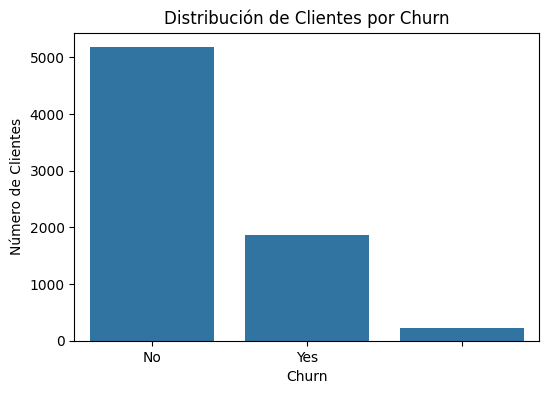


Porcentaje de Clientes por Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes en cada categoría de Churn
churn_counts = df_telecom_relevante['Churn'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

# Mostrar los porcentajes también
churn_percentages = df_telecom_relevante['Churn'].value_counts(normalize=True) * 100
print("\nPorcentaje de Clientes por Churn:")
print(churn_percentages)

#**Recuento de evasión por variables categóricas**

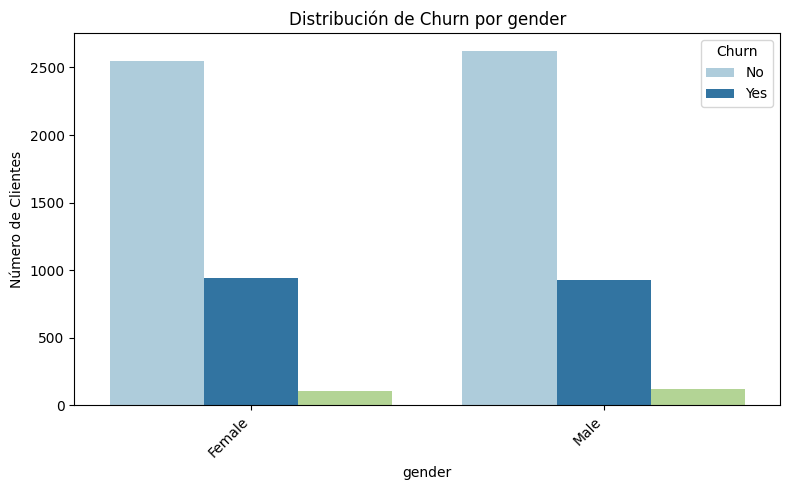

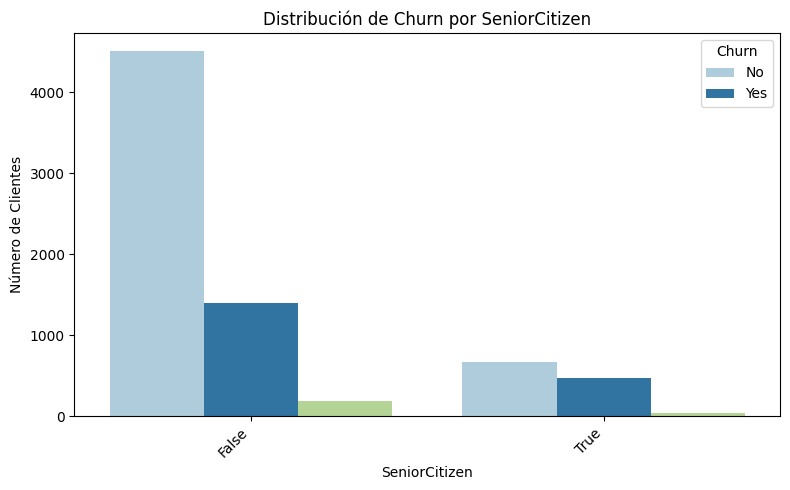

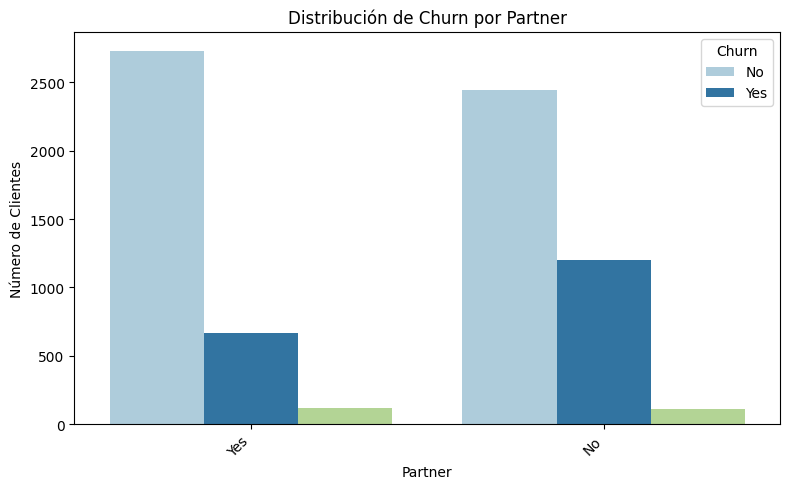

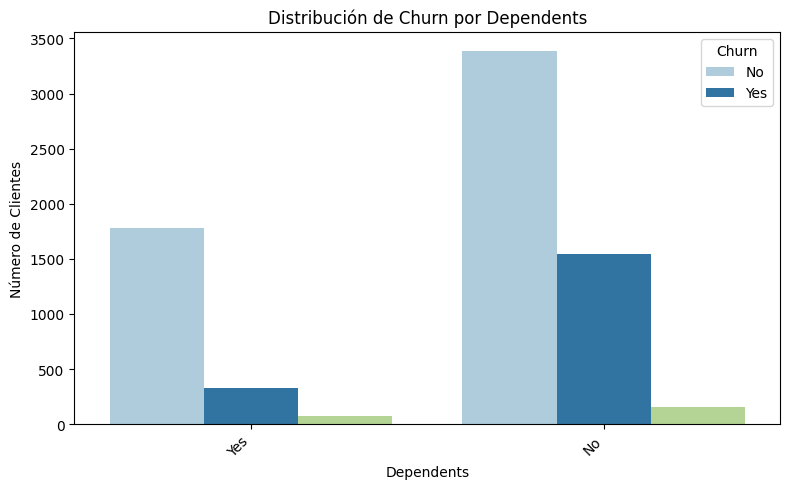

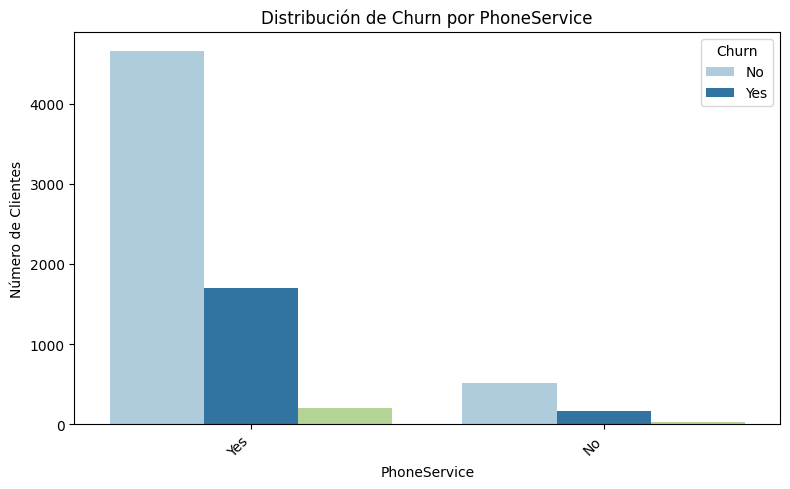

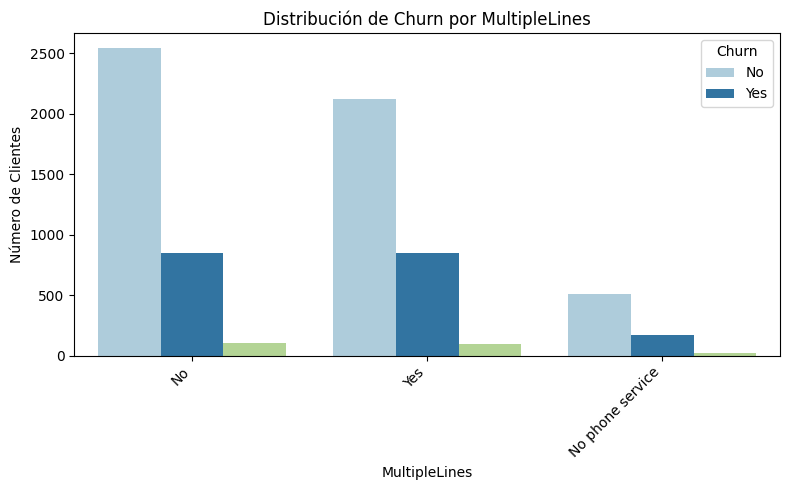

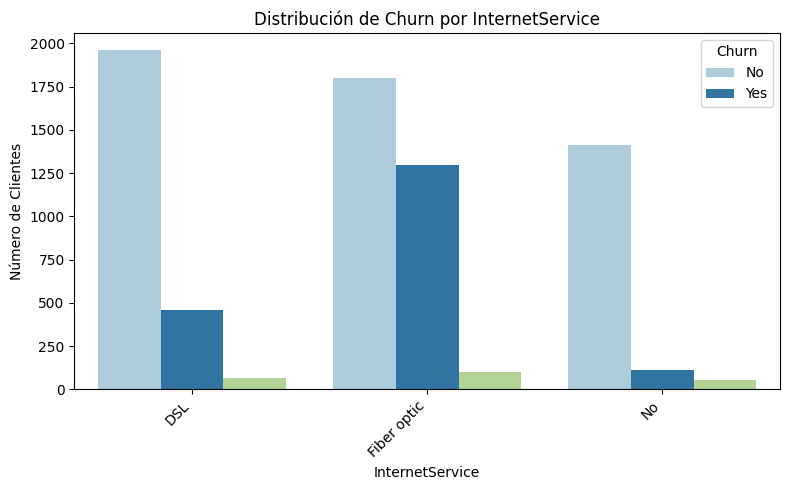

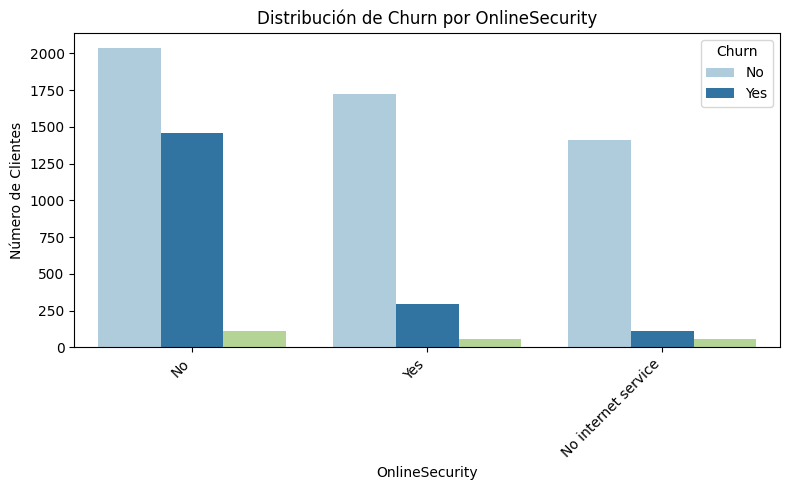

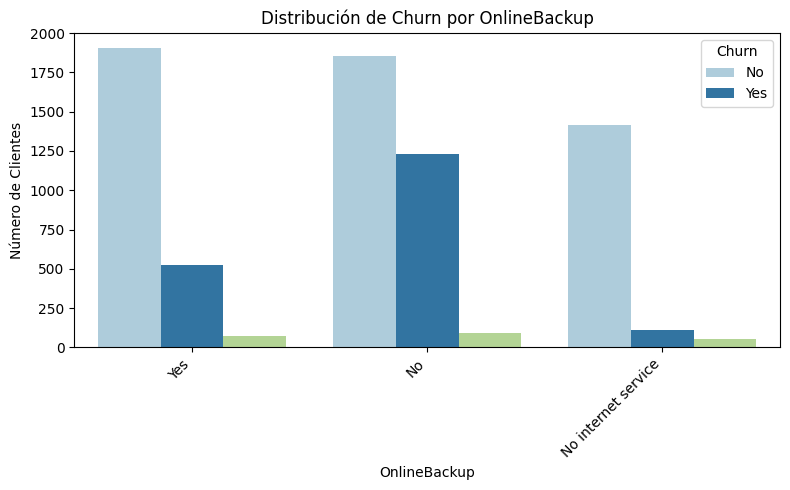

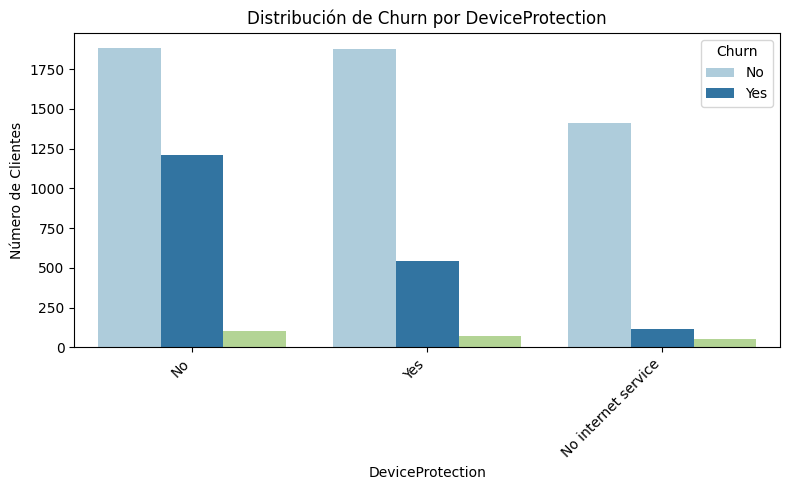

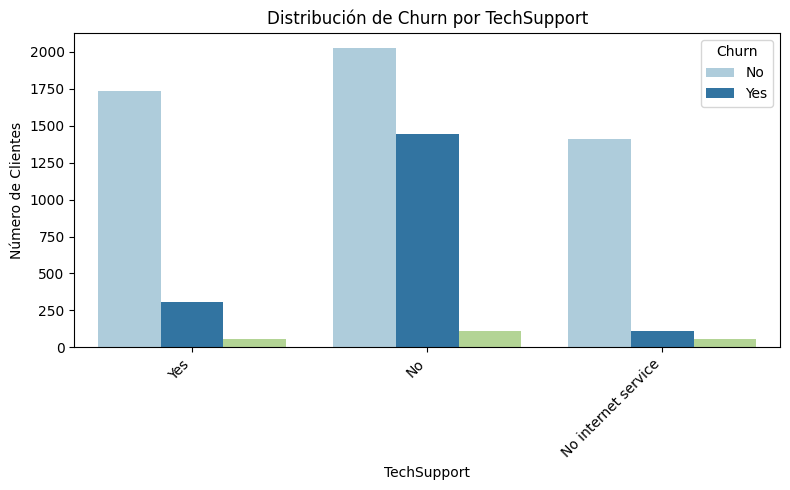

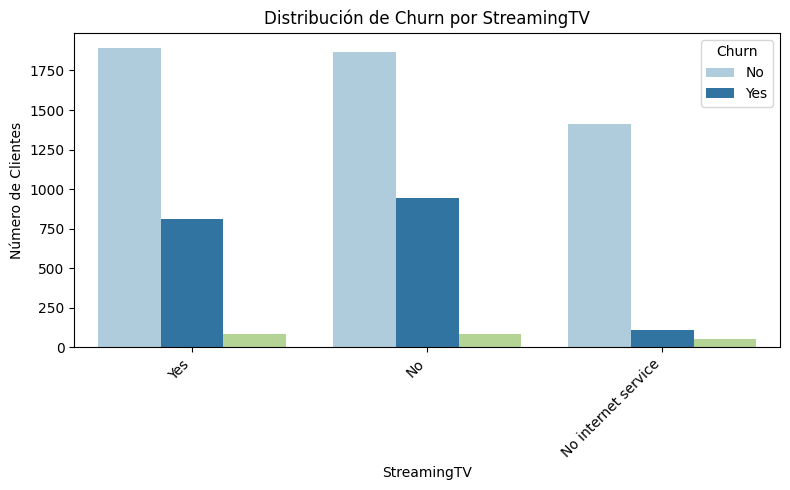

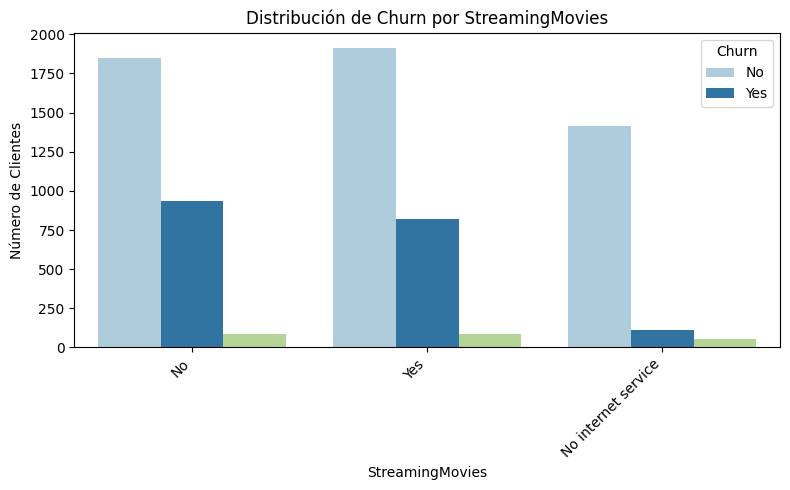

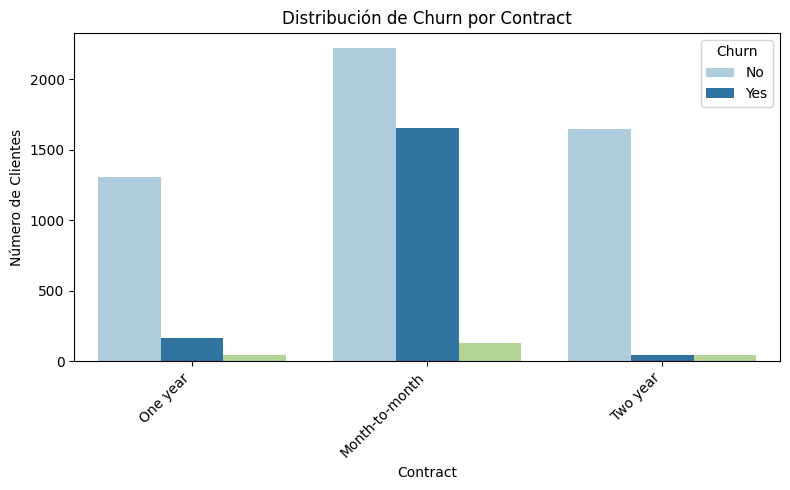

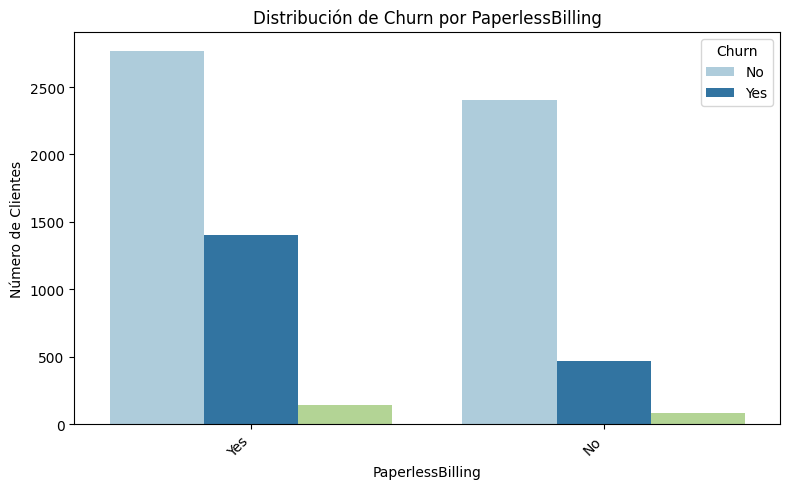

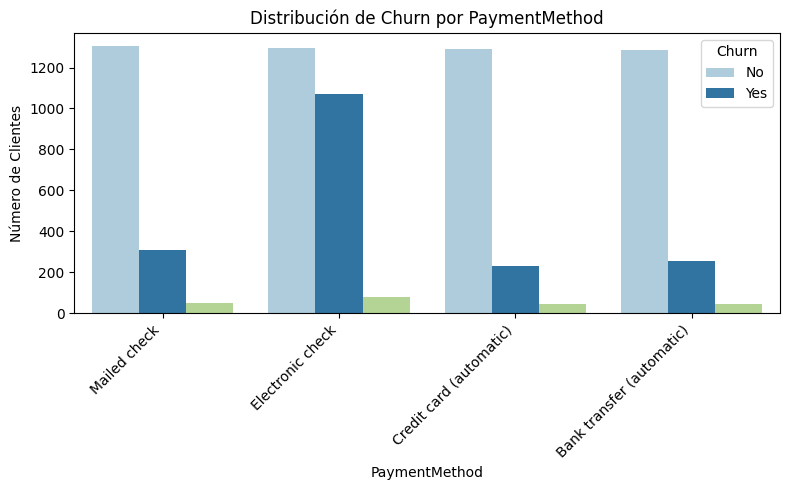

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar algunas columnas categóricas relevantes para el análisis de Churn
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Crear gráficos de barras para cada columna categórica mostrando la distribución de Churn
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_telecom_relevante, x=col, hue='Churn', palette='Paired')
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
    plt.tight_layout() # Ajustar diseño para evitar solapamiento
    plt.show()


#**Conteo de evasión por variables numéricas**

/tmp/ipython-input-2500728188.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


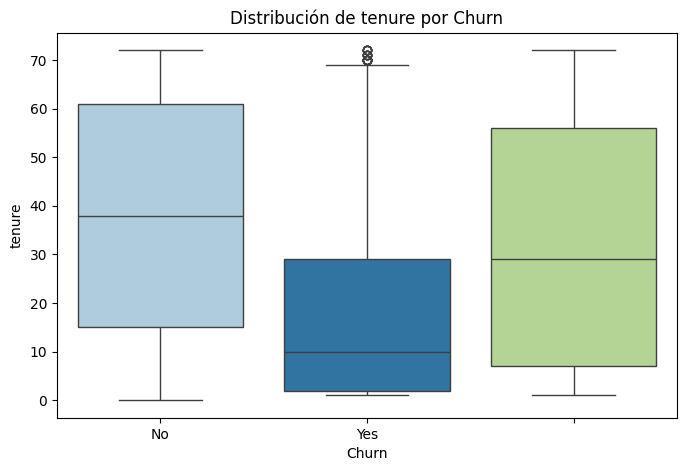

/tmp/ipython-input-2500728188.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


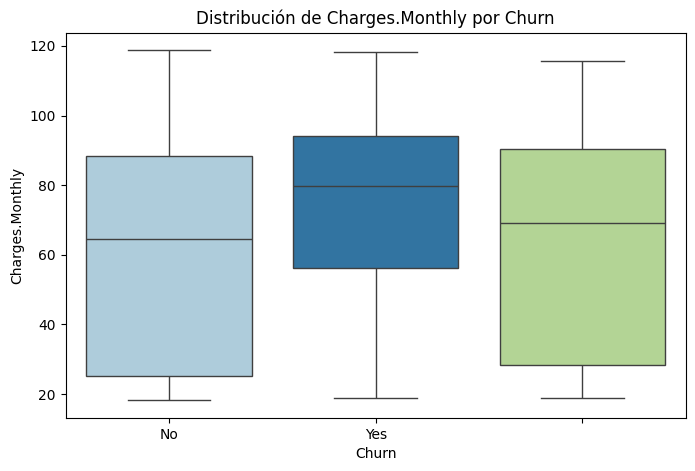

/tmp/ipython-input-2500728188.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


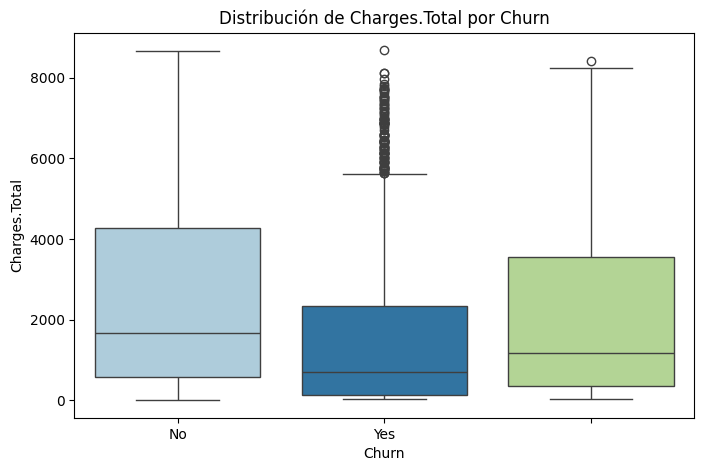

/tmp/ipython-input-2500728188.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


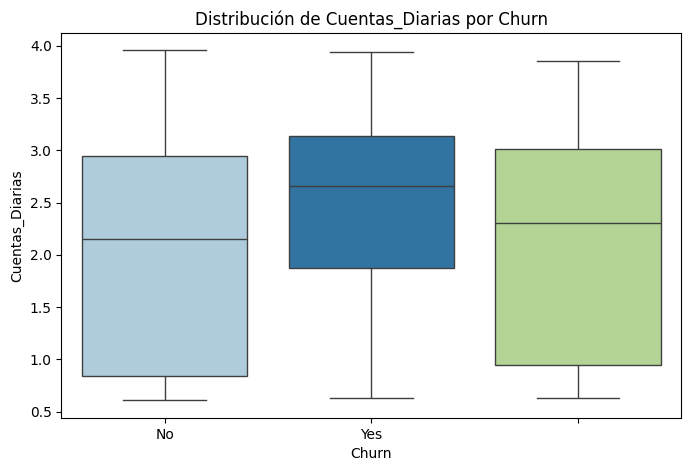

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas relevantes
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Crear box plots para cada columna numérica mostrando la distribución por Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

/tmp/ipython-input-997012364.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


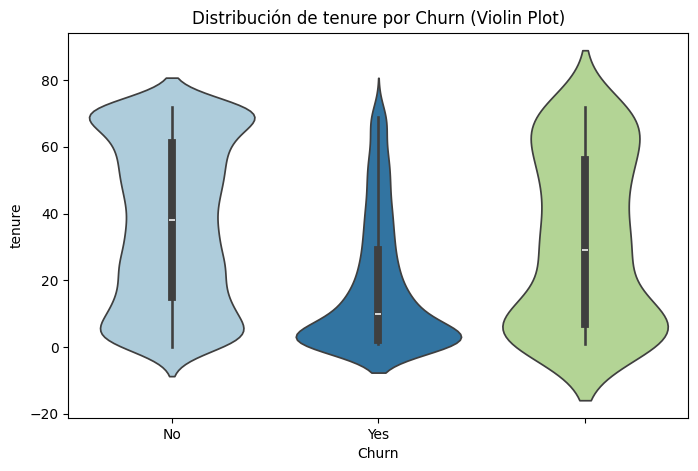

/tmp/ipython-input-997012364.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


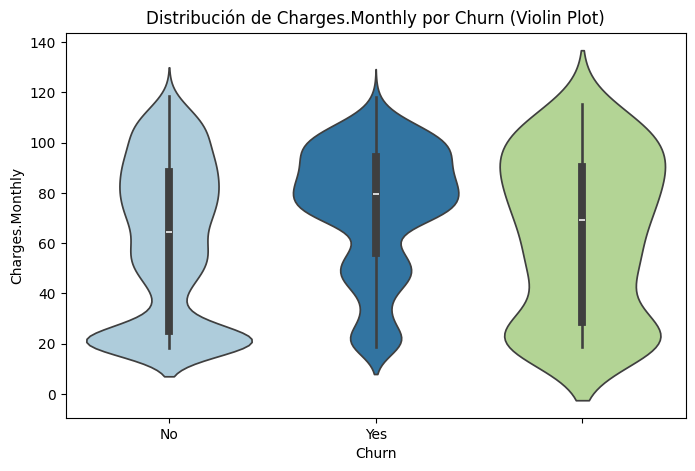

/tmp/ipython-input-997012364.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante[df_telecom_relevante['tenure'] > 0], x='Churn', y=col, palette='Paired')


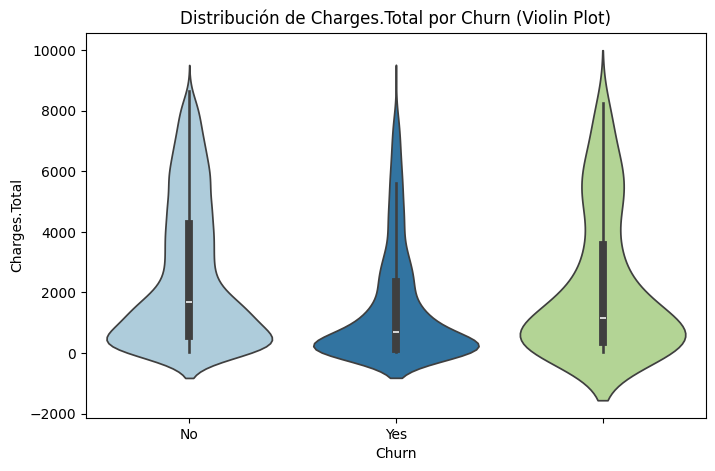

/tmp/ipython-input-997012364.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')


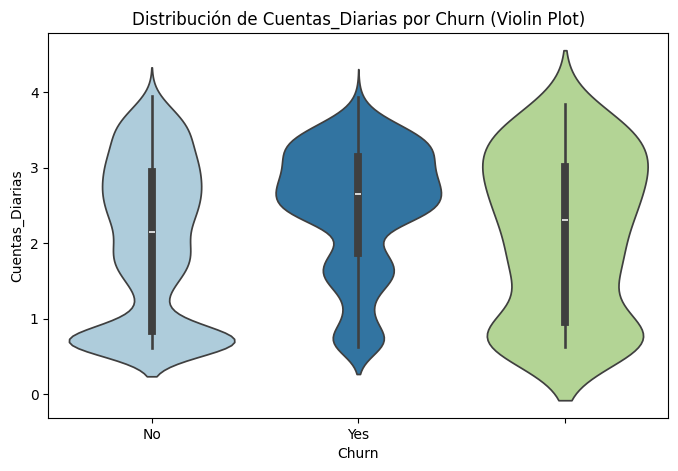

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas relevantes
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Crear gráficos de violín para cada columna numérica mostrando la distribución por Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    if col == 'Charges.Total':
        # For Charges.Total, exclude customers with tenure 0 as their total charges are 0 for a clearer visualization
        sns.violinplot(data=df_telecom_relevante[df_telecom_relevante['tenure'] > 0], x='Churn', y=col, palette='Paired')
    else:
        sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='Paired')
    plt.title(f'Distribución de {col} por Churn (Violin Plot)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [27]:
# Guardar el dataframe procesado a un archivo CSV
df_telecom_relevante.to_csv('df_telecom.csv', index=False)

# Cargar el archivo CSV que contiene los datos tratados anteriormente
df_telecom_parte2 = pd.read_csv('df_telecom.csv')

# Mostrar las primeras filas y información del DataFrame cargado
print("cargado para la Parte 2:")
print(df_telecom_parte2.head())
df_telecom_parte2.info()


cargado para la Parte 2:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female          False     Yes        Yes       9   
1  0003-MKNFE    No    Male          False      No         No       9   
2  0004-TLHLJ   Yes    Male          False      No         No       4   
3  0011-IGKFF   Yes    Male           True     Yes         No      13   
4  0013-EXCHZ   Yes  Female           True     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes            

#**Modelo Predictivo**

#**Elminar Colunmas No Necesarias**

In [28]:

# Eliminar la columna 'customerID'
df_models = df_telecom_parte2.drop('customerID', axis=1)

# Mostrar las primeras filas e información del nuevo DataFrame
print("DataFrame df_models después de eliminar customerID:")
print(df_models.head())
df_models.info()

DataFrame df_models después de eliminar customerID:
  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female          False     Yes        Yes       9          Yes   
1    No    Male          False      No         No       9          Yes   
2   Yes    Male          False      No         No       4          Yes   
3   Yes    Male           True     Yes         No      13          Yes   
4   Yes  Female           True     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBil

#**Encoding**

In [29]:

# Identificar las columnas categóricas (excluyendo la variable objetivo 'Churn')
categorical_cols = df_models.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Aplicar One-Hot Encoding a las columnas categóricas
df_models_encoded = pd.get_dummies(df_models, columns=categorical_cols, drop_first=True)

# Construir el diccionario de mapeo
encoding_map = {}
for col in categorical_cols:
    # Get the list of new columns created from the original categorical column
    new_cols = [c for c in df_models_encoded.columns if c.startswith(f'{col}_')]

    # Get the unique values from the original column (excluding the one dropped by drop_first=True)
    original_values = df_models[col].unique().tolist()
    if len(new_cols) > 0 and new_cols[0].endswith('_' + original_values[-1]):
         # If the last value was dropped, remove it from the original_values list
        original_values = original_values[:-1]


    # Create the mapping for the current column
    col_mapping = {}
    for i, new_col in enumerate(new_cols):
        # The new column name is typically 'original_column_original_value'
        # We can extract the original value from the new column name
        original_value_from_col = new_col[len(col) + 1:]
        col_mapping[original_value_from_col] = new_col

    encoding_map[col] = col_mapping


# Mostrar las primeras filas e información del DataFrame codificado
print("DataFrame df_models después de One-Hot Encoding:")
display(df_models_encoded.head())
df_models_encoded.info()

# Mostrar el diccionario de mapeo
print("\nDiccionario de Mapeo de la Codificación:")
import json
print(json.dumps(encoding_map, indent=4))

DataFrame df_models después de One-Hot Encoding:


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,False,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,No,False,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,Yes,False,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,Yes,True,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,Yes,True,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   object 
 1   SeniorCitizen                          7267 non-null   bool   
 2   tenure                                 7267 non-null   int64  
 3   Charges.Monthly                        7267 non-null   float64
 4   Charges.Total                          7267 non-null   float64
 5   Cuentas_Diarias                        7267 non-null   float64
 6   gender_Male                            7267 non-null   bool   
 7   Partner_Yes                            7267 non-null   bool   
 8   Dependents_Yes                         7267 non-null   bool   
 9   PhoneService_Yes                       7267 non-null   bool   
 10  MultipleLines_No phone service         7267 non-null   bool   
 11  Mult

#**Verificación de la Proporción de Cancelación (Churn)**


In [30]:

# Calcular la proporción de clientes que cancelaron (Churn)
churn_proportion = df_models_encoded['Churn'].value_counts(normalize=True) * 100

print("Proporción de clientes por Churn:")
print(churn_proportion)

# Evaluar si existe un desbalance
# Generalmente, un desbalance se considera significativo si una clase es mucho más pequeña que la otra (por ejemplo, menos del 10-20% de la clase minoritaria)
# En este caso, evaluaremos si la proporción de la clase 'Yes' es significativamente menor que la de 'No'.

minority_class_percentage = churn_proportion.min()
if minority_class_percentage < 20: # Umbral comúnmente utilizado, puede ajustarse
    print("\nExiste un desbalance significativo en la variable objetivo 'Churn'.")
else:
    print("\nNo parece haber un desbalance significativo en la variable objetivo 'Churn'.")

Proporción de clientes por Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

No parece haber un desbalance significativo en la variable objetivo 'Churn'.


#**Data Frame Normalizado**

In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Identificar las columnas numéricas (excluyendo la variable objetivo 'Churn', que no es numérica)
# Excluimos 'Churn' ya que es la variable objetivo y no debe ser escalada
numerical_cols = df_models_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas numéricas
df_models_encoded[numerical_cols] = scaler.fit_transform(df_models_encoded[numerical_cols])

# Mostrar las primeras filas e información del DataFrame normalizado
print("DataFrame df_models_encoded después de la normalización:")
display(df_models_encoded.head())
df_models_encoded.info()

DataFrame df_models_encoded después de la normalización:


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,False,0.125000,0.471144,0.068315,0.471144,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,No,False,0.125000,0.414428,0.062454,0.414428,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,Yes,False,0.055556,0.553731,0.032338,0.553731,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,Yes,True,0.180556,0.793532,0.142531,0.793532,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,Yes,True,0.041667,0.653234,0.030789,0.653234,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   object 
 1   SeniorCitizen                          7267 non-null   bool   
 2   tenure                                 7267 non-null   float64
 3   Charges.Monthly                        7267 non-null   float64
 4   Charges.Total                          7267 non-null   float64
 5   Cuentas_Diarias                        7267 non-null   float64
 6   gender_Male                            7267 non-null   bool   
 7   Partner_Yes                            7267 non-null   bool   
 8   Dependents_Yes                         7267 non-null   bool   
 9   PhoneService_Yes                       7267 non-null   bool   
 10  MultipleLines_No phone service         7267 non-null   bool   
 11  Mult

#**Correlación y Selección de Variables**

#Análisis de Correlación

/tmp/ipython-input-3454063583.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_models_encoded['Churn_numeric'] = df_models_encoded['Churn'].replace({'No': 0, 'Yes': 1, '': np.nan})


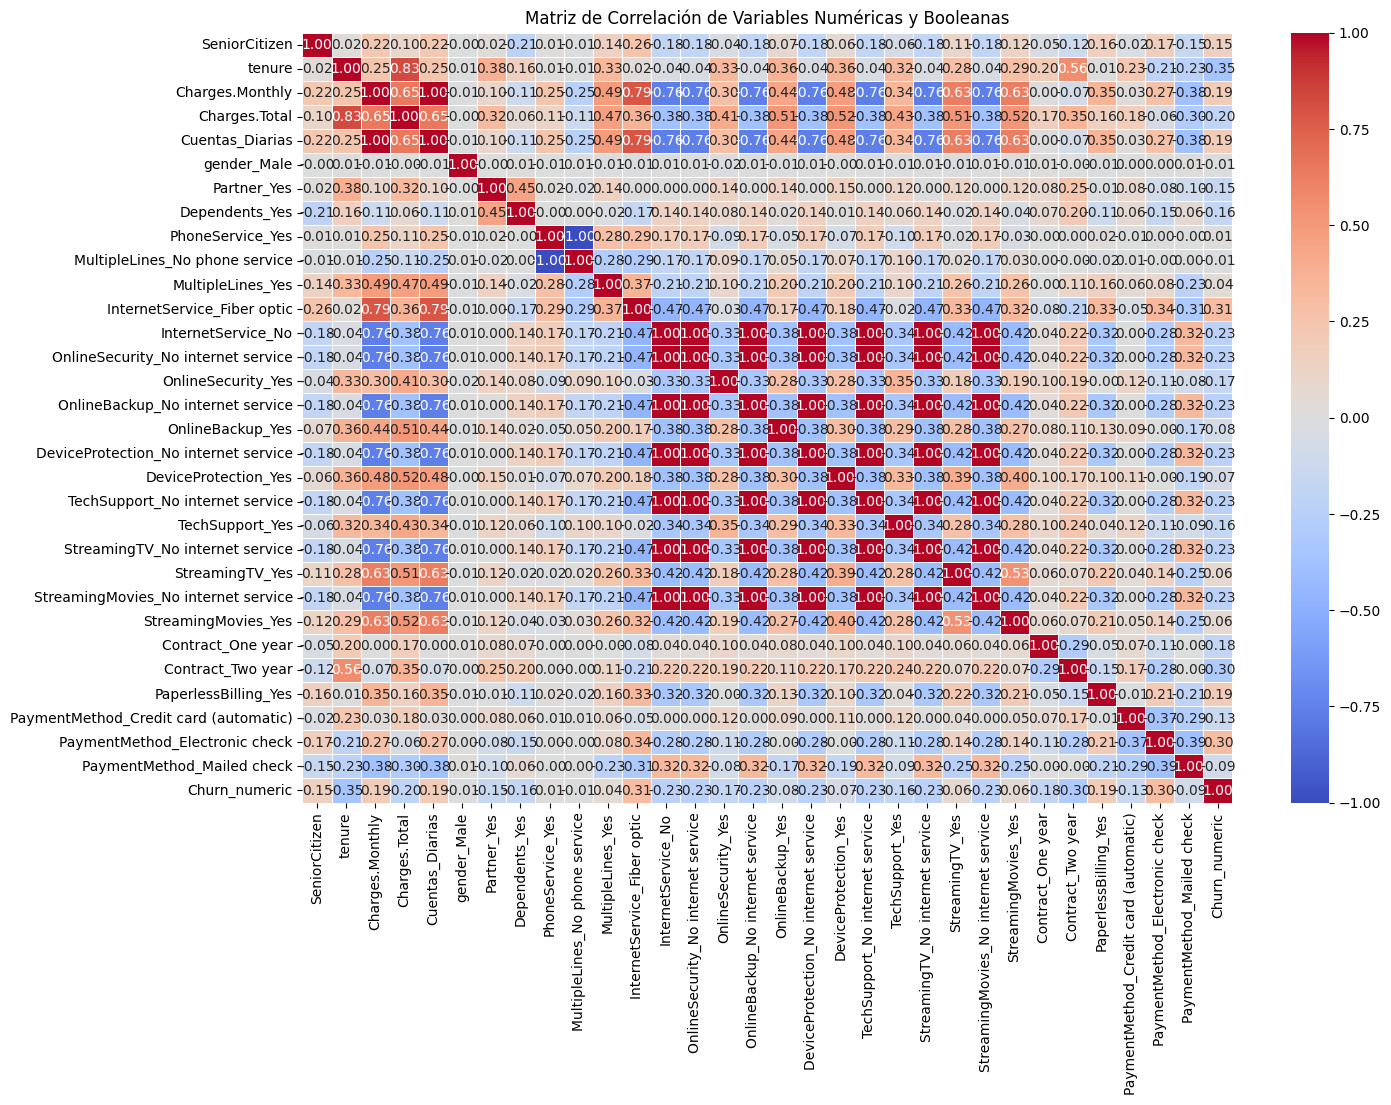


Correlación con Churn:
Churn_numeric                            1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Cuentas_Diarias                          0.193356
Charges.Monthly                          0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes           

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convertir la variable objetivo 'Churn' a numérico (0 para 'No', 1 para 'Yes')
# Manejar los valores vacíos o nulos en 'Churn' si existen, por ejemplo, mapeándolos a NaN y luego eliminando esas filas o imputando.
# Basado en la exploración previa, hay valores vacíos (''). Los mapearemos a NaN.
df_models_encoded['Churn_numeric'] = df_models_encoded['Churn'].replace({'No': 0, 'Yes': 1, '': np.nan})

# Eliminar filas con valores nulos en 'Churn_numeric' que resultaron del mapeo de valores vacíos
df_models_corr = df_models_encoded.dropna(subset=['Churn_numeric']).copy()

# Convertir 'Churn_numeric' a tipo entero después de eliminar los NaN
df_models_corr['Churn_numeric'] = df_models_corr['Churn_numeric'].astype(int)


# Seleccionar solo las columnas numéricas y booleanas para la matriz de correlación
# Incluimos las columnas booleanas ya que value_counts mostró que SeniorCitizen es booleana
numerical_and_boolean_cols = df_models_corr.select_dtypes(include=[np.number, 'bool']).columns.tolist()

# Calcular la matriz de correlación
# Excluimos la columna 'Churn' original que es object type
correlation_matrix = df_models_corr[numerical_and_boolean_cols].corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Booleanas')
plt.show()

# Mostrar las correlaciones con 'Churn_numeric' específicamente
print("\nCorrelación con Churn:")
print(correlation_matrix['Churn_numeric'].sort_values(ascending=False))

#**Análisis Dirigido**

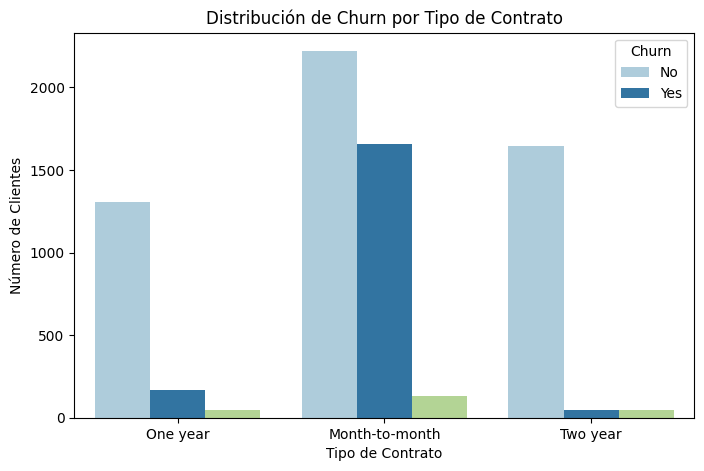

/tmp/ipython-input-3388843232.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y='Charges.Total', palette='Paired')


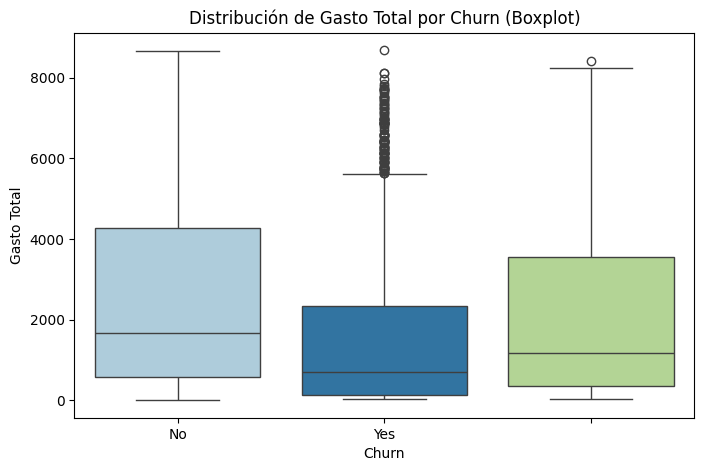

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la relación entre 'Contract' y 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_telecom_relevante, x='Contract', hue='Churn', palette='Paired')
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Visualizar la relación entre 'Charges.Total' y 'Churn' usando un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_telecom_relevante, x='Churn', y='Charges.Total', palette='Paired')
plt.title('Distribución de Gasto Total por Churn (Boxplot)')
plt.xlabel('Churn')
plt.ylabel('Gasto Total')
plt.show()


#**Modelado Predictivo**

#Separación de Datos

In [36]:

from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = df_models_corr.drop('Churn_numeric', axis=1) # Usamos la columna numérica de Churn
y = df_models_corr['Churn_numeric']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Usamos stratify para mantener la proporción de Churn en ambos conjuntos

print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma de las etiquetas de entrenamiento (y_train):", y_train.shape)
print("Forma de las etiquetas de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (5634, 32)
Forma del conjunto de prueba (X_test): (1409, 32)
Forma de las etiquetas de entrenamiento (y_train): (5634,)
Forma de las etiquetas de prueba (y_test): (1409,)


#Creación de Modelos
#Modelo que requiere normalización
#K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo KNN
# Puedes experimentar con diferentes valores de n_neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento normalizados
# Asegúrate de que X_train usado aquí es el DataFrame normalizado/escalado
# Excluir la columna 'Churn' del conjunto de características
X_train_numeric = X_train.drop('Churn', axis=1)
X_test_numeric = X_test.drop('Churn', axis=1)


model_knn.fit(X_train_numeric, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = model_knn.predict(X_test_numeric)

# Evaluar el rendimiento del modelo
print("Evaluación del modelo K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Evaluación del modelo K-Nearest Neighbors (KNN):
Accuracy: 0.7622427253371186

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409


Confusion Matrix:
[[890 145]
 [190 184]]




*  El modelo KNN tiene una precisión general aceptable (76.22%), pero su rendimiento es notablemente mejor para predecir la clase mayoritaria (No Churn) que para la clase minoritaria (Yes Churn). Tiene una precisión y recall bajos para la clase 'Yes', lo que significa que a menudo predice incorrectamente que un cliente no evadirá cuando en realidad sí lo hace (muchos falsos negativos).

*   Esto es algo común en datasets con cierto desbalance de clases (aunque aquí el desbalance no era severo) y sugiere que el modelo KNN con la configuración actual puede no ser el mejor para identificar a los clientes que realmente evadirán, lo cual es crucial para estrategias de retención. Podríamos intentar ajustar los hiperparámetros del KNN (como n_neighbors) o probar otros modelos que manejen mejor este tipo de problemas.



#**Modelo puede no requiere normalización**

#Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo Random Forest
# Puedes ajustar parámetros como n_estimators (número de árboles) y random_state
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
# Los modelos basados en árboles no requieren normalización, así que usamos X_train directamente.
# Asegúrate de que X_train no contenga la columna 'Churn' (object type) - ya la eliminamos en una celda anterior.
model_rf.fit(X_train_numeric, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_numeric)

# Evaluar el rendimiento del modelo
print("Evaluación del modelo Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Evaluación del modelo Random Forest:
Accuracy: 0.7863733144073811

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409


Confusion Matrix:
[[937  98]
 [203 171]]




*  El modelo Random Forest logró una precisión general del 78.64%, lo que representa una mejora con respecto al modelo KNN. Al evaluar su rendimiento por clase, se observa que es muy efectivo prediciendo la clase mayoritaria ('No Churn'), con un alto recall (91%), lo que significa que identifica correctamente a la gran mayoría de los clientes que no evadirán.


*   Sin embargo, al igual que el KNN, el modelo Random Forest presenta desafíos para identificar a la clase minoritaria ('Yes Churn'). Aunque su precisión para la clase 'Yes' (64%) es mejor que la del KNN, su recall (46%) es ligeramente inferior, lo que indica que aún hay un número considerable de clientes que evaden y que el modelo no logra identificar (falsos negativos).



*   Estos resultados sugieren que, si bien el Random Forest es generalmente más preciso, la identificación de los clientes propensos a la evasión sigue siendo un desafío. Para mejorar la capacidad del modelo para detectar la evasión, podríamos explorar la optimización de sus hiperparámetros, probar técnicas para manejar el desbalance de clases (aunque el desbalance no es severo, puede influir) o considerar otros algoritmos de clasificación.



#**Evaluación del Modelo K-Nearest Neighbors (KNN)**


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba con el modelo KNN
y_pred_knn = model_knn.predict(X_test_numeric) # Usamos X_test_numeric como antes

# Evaluar el rendimiento del modelo KNN
print("Evaluación del modelo K-Nearest Neighbors (KNN):")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_knn))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))

Evaluación del modelo K-Nearest Neighbors (KNN):
Exactitud (Accuracy): 0.7622427253371186
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409

Matriz de Confusión:
[[890 145]
 [190 184]]


#Evaluación del Modelo Random Forest

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba con el modelo Random Forest
y_pred_rf = model_rf.predict(X_test_numeric) # Usamos X_test_numeric como antes

# Evaluar el rendimiento del modelo Random Forest
print("Evaluación del modelo Random Forest:")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_rf))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Evaluación del modelo Random Forest:
Exactitud (Accuracy): 0.7863733144073811
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409

Matriz de Confusión:
[[937  98]
 [203 171]]


#**informe final**

#Análisis de Evasión de Clientes (Churn)

#1. Introducción



*   Este informe presenta un análisis exploratorio realizado sobre los datos de clientes de TelecomX, con el propósito de identificar los factores que influyen en que los clientes abandonen el servicio. La pérdida de clientes es un reto importante para las empresas de telecomunicaciones, ya que afecta directamente los ingresos. Por eso, entender qué motiva a un cliente a cancelar el servicio es esencial para tomar acciones que mejoren la retención.




#2. Preparación y Limpieza de los Datos



*  El análisis comenzó con la carga del conjunto de datos desde una API. Inicialmente, muchas columnas estaban organizadas en estructuras JSON anidadas, lo cual dificultaba su análisis. Para facilitar el trabajo, se descompusieron esas columnas (customer, phone, internet, account) en columnas separadas, generando un nuevo DataFrame más claro y fácil de manejar (df_telecom_expanded).



*  Después, se seleccionaron las variables más relevantes para estudiar la evasión (df_telecom_relevante). En el proceso, se detectaron datos incorrectos en la columna Charges.Total, donde algunas entradas estaban vacías (‘ ’), lo cual impedía su conversión a tipo numérico. Estos valores fueron reemplazados por 0.0 y luego convertidos a tipo float. También se corrigió el tipo de dato de la columna SeniorCitizen para que sea booleana.



*   Además, se creó una nueva variable llamada Cuentas_Diarias, que calcula un estimado del gasto diario dividiendo el cargo mensual entre 30. Finalmente, se confirmó que no hubiera datos nulos ni duplicados en el conjunto de datos limpio.



#3. Análisis Exploratorio

Se realizó un estudio detallado para entender la distribución del churn y su relación con otras variables.

*   **Distribución general del churn:** A través de un gráfico de barras, se observó que la mayoría de los clientes permanecen activos, aunque una proporción importante ha cancelado el servicio. Esto refuerza la necesidad del análisis.
*  **Relación entre variables categóricas y churn:**


*  Género: No hay una diferencia significativa entre hombres y mujeres.

*  SeniorCitizen: Los clientes mayores tienen una tasa de evasión algo más alta
*  Partner y Dependents: Las personas sin pareja o sin dependientes son más propensas a irse.


*  PhoneService y MultipleLines: Tener múltiples líneas podría tener cierto impacto, aunque el servicio telefónico en sí no parece ser un factor clave.

*   InternetService: Los clientes con internet de fibra óptica tienden a abandonar más que los de DSL o sin internet. Es un hallazgo importante.

*   Servicios adicionales (seguridad, respaldo, soporte, streaming, etc.): Los clientes sin estos servicios tienen más probabilidades de abandonar, lo que indica que estas opciones podrían estar ligadas a la fidelización.
*   Contract: Quienes tienen contratos mes a mes presentan tasas de evasión mucho mayores que quienes optaron por planes anuales


*   PaperlessBilling: La facturación electrónica se asocia a una mayor evasión.

*   PaymentMethod: El método “Electronic check” se relaciona con mayor abandono que otras formas de pago.


* ** Relación con variables numéricas (gráficos de violín):**



*   Tenure: Los clientes que abandonan suelen tener menor antigüedad.
*   Charges.Monthly: Cuentan con cargos mensuales más altos, usualmente por servicios como fibra óptica o paquetes completos.

*   Charges.Total: Quienes se mantienen como clientes han acumulado más gastos totales, lo que se relaciona con mayor permanencia.















#4. Conclusiones y Hallazgos Clave

**Los datos revelan ciertos patrones claros que ayudan a entender la evasión de clientes:**



*  Antigüedad: Los clientes nuevos son los más propensos a irse.

*  Tipo de conexión: La fibra óptica se relaciona con tasas de evasión más altas.

*  Servicios adicionales: La ausencia de servicios extra aumenta la probabilidad de abandono.
* Tipo de contrato: Los contratos mensuales son un fuerte indicador de fuga.


*   Método de pago: El cheque electrónico está fuertemente ligado a la evasión.


*   Cargos mensuales altos: Aunque los servicios más completos pueden atraer clientes, también podrían generar más cancelaciones si las expectativas no se cumplen.


Estos factores no se presentan al azar. Existen patrones consistentes que permiten predecir quién tiene mayor probabilidad de cancelar el servicio.


#5. Recomendaciones Estratégicas

**Con base en los hallazgos, se sugieren las siguientes acciones:**





1.  Retención de nuevos clientes: Diseñar campañas de bienvenida y seguimiento para quienes llevan poco tiempo en la empresa, pues son los más vulnerables a irse.

2.  Revisión del servicio de fibra óptica: Investigar las causas del descontento entre estos clientes (calidad, soporte, etc.) y tomar medidas correctivas.

3.   Promoción de servicios adicionales: Incentivar su contratación con descuentos, paquetes especiales o beneficios, ya que se asocian a una mayor fidelización.

4.   Fomentar contratos a largo plazo: Ofrecer recompensas a quienes opten por planes anuales o bianuales.

5.   Análisis del método “Electronic Check”: Investigar si el problema está en el sistema de pagos o en el perfil de quienes eligen esta opción

6.   Segmentación inteligente: Usar estos patrones para identificar a los clientes en riesgo y enviarles ofertas personalizada

7.  Seguimiento constante: Establecer un sistema de monitoreo continuo que permita ajustar las estrategias cuando se detecten cambios en el comportamiento de los clientes.










#**🧾 Resumen Ejecutivo - Análisis de Evasión de Clientes en TelecomX**

#🎯 Objetivo
Identificar los factores que influyen en la cancelación del servicio por parte de los clientes y proponer estrategias efectivas para mejorar la retención.

#🔍 Hallazgos Principales




1.   Clientes nuevos = Mayor riesgo de cancelación
Los clientes con menor antigüedad (tenure) son los más propensos a irse. La etapa inicial es crítica.

2.   Contratos mensuales aumentan la evasión
La tasa de cancelación es mucho mayor en clientes con contratos mes a mes en comparación con contratos anuales o bianuales.

3.  Fibra óptica con alto índice de cancelación
Usuarios de este servicio muestran mayor propensión a cancelar, posiblemente por problemas de calidad o atención.
4.  Falta de servicios adicionales = más riesgo
Clientes sin seguridad online, respaldo, soporte técnico o servicios de streaming tienden a irse más rápido.


5.  Pago con cheque electrónico = indicador de evasión
Este método está asociado a una mayor rotación, quizás por su facilidad de cancelación o perfil del usuario


6.   Cargos mensuales altos pueden generar insatisfacción
Clientes que pagan más suelen tener expectativas más altas. Si no se cumplen, abandonan.


#💡 Recomendaciones Estratégicas



1.  Programa de retención para nuevos clientes
Acompañamiento intensivo los primeros meses: bienvenida, soporte prioritario y beneficios iniciales.

2. Incentivar contratos de largo plazo
Ofrecer descuentos o beneficios para quienes firmen por 12 o 24 meses.

3.  Optimizar el servicio de fibra óptica
Revisar calidad, soporte e incorporar servicios extra que aumenten el valor percibido.

4.   Promover servicios complementarios
Ofrecer paquetes con seguridad, respaldo y soporte técnico. Incluso con pruebas gratis o descuentos.
5. Mejorar métodos de pago
Analizar y optimizar la experiencia de quienes usan cheque electrónico. Promover medios de pago más estables.


6.  Ofertas personalizadas para clientes de alto costo mensual
Evaluar si perciben valor suficiente. Si no, ofrecer ajustes o beneficios exclusivos.


7.  Segmentación y acción preventiva
Usar modelos predictivos para identificar clientes en riesgo y aplicar campañas específicas antes de que cancelen.






#**✅ Conclusión**

La cancelación del servicio no es aleatoria: responde a patrones claros que pueden ser gestionados con datos. Aplicando estas estrategias, TelecomX puede reducir la evasión, mejorar la experiencia del cliente y fortalecer la lealtad.